In [16]:
import requests
import pandas as pd
from io import StringIO

from matplotlib.pyplot import *

In [54]:
# resp = requests.get('https://stooq.com/q/d/l/?s=^spx&i=d')
# data = pd.read_csv(StringIO(resp.text))
# data.to_csv('data.csv')
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

data = data.resample(
    'M',
    how={
        'Close': 'last',
    },
)

data = data.fillna(method='ffill')

/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  # This is added back by InteractiveShellApp.init_path()


In [55]:
data['returns'] = (data.Close - data.Close.shift(1)) / data.Close.shift(1)
data['mv'] = data.rolling(10*12).mean().returns

([<matplotlib.axis.XTick at 0x7f4438880b70>,
 <a list of 3 Text xticklabel objects>)

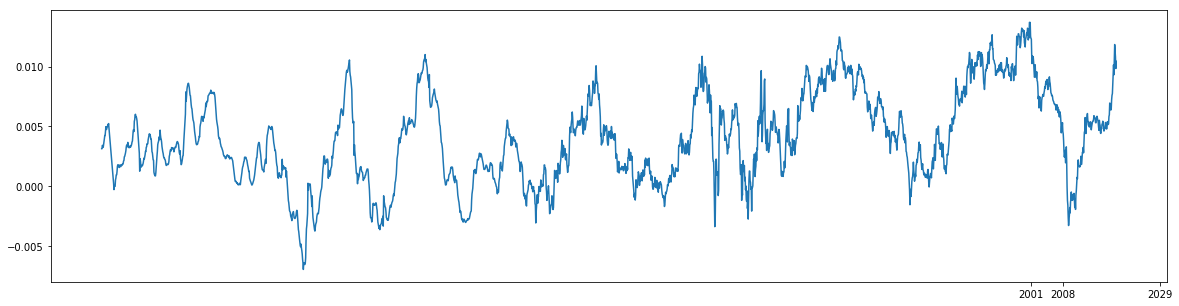

In [60]:
prices = data.Close.values

figure(figsize=(20, 5))

plot(data.mv)

xticks(['2001-01-01', '2008-01-01', '2029-01-01'])